In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/extracted_dataset.csv')
df

,Course Code,Course Title,Student Number,Department Code,Course Level,Letter Grade,Status,GPA,Standing,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Semester,Theoritical,Practical,Course Credit,ECTS,Course Year
0,UNI 111,Critical Reading & Writing in Turkish I,240,SOC,Undergraduate,F,Unsuccessful,2.62,Freshman,18,30,2.616667,2.113636,2.703226,2010 - Fall,3,0,3,5,1
1,UNI 107,World Civilizations& Global Encounters I,338,PSY,Undergraduate,A,Successful,3.68,Freshman,18,30,3.683333,2.986364,2.703226,2010 - Fall,3,0,3,5,1
2,UNI 105,Understanding Society and Culture I,338,PSY,Undergraduate,A,Successful,3.68,Freshman,18,30,3.683333,3.211538,2.703226,2010 - Fall,3,0,3,5,1
3,UNI 203,Understanding Science and Technology,338,PSY,Undergraduate,A,Successful,3.68,Freshman,18,30,3.683333,3.176000,2.703226,2010 - Fall,3,0,3,5,2
4,UNI 105,Understanding Society and Culture I,240,SOC,Undergraduate,A,Successful,2.62,Freshman,18,30,2.616667,3.211538,2.703226,2010 - Fall,3,0,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48736,MGT 531,Stratejik Yönetim,1102,MBA/NT,Graduate,A-,Successful,3.80,Freshman,24,40,3.800000,3.391758,3.049526,2014 - Spring,3,0,3,5,5
48737,MGT 585,Operasyon Yönetimi,1102,MBA/NT,Graduate,A,Successful,3.80,Freshman,24,40,3.800000,3.440476,3.049526,2014 - Spring,3,0,3,5,5
48738,MGT 552,İnsan Kaynakları Yönetimi,1102,MBA/NT,Graduate,A,Successful,3.80,Freshman,24,40,3.800000,3.393077,3.049526,2014 - Spring,3,0,3,5,5
48739,MGT 574,Makroekonomik Göster. ve Pol. Anal.,1984,MBA/NT,Graduate,A-,Successful,3.20,Sophomore,24,40,3.200000,3.570769,3.049526,2014 - Spring,3,0,3,5,5


         Semester  Letter Grade
0     2010 - Fall           319
1   2010 - Spring           422
2   2010 - Summer            48
3     2011 - Fall          1432
4   2011 - Spring          1810
5   2011 - Summer           212
6     2012 - Fall          3643
7   2012 - Spring          4263
8   2012 - Summer           371
9     2013 - Fall          6736
10  2013 - Spring          7668
11  2013 - Summer           731
12    2014 - Fall         10439
13  2014 - Spring         10647


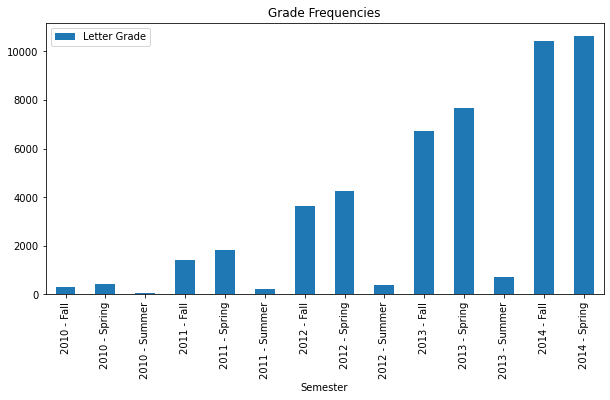

In [3]:
grade_dist = df[['Semester', 'Letter Grade']].groupby(['Semester'], as_index=False).count()
print(grade_dist)
grade_dist.plot('Semester', 'Letter Grade', 'bar', title='Grade Frequencies', figsize=(10,5))

There are 14 semesters available in the dataset. Since there are only 8 semesters available in standard undergraduate programs, we consider 8 semesters and add previous semesters' data to the next highest one.

Details:

* 2010 - Fall, Spring and Summer are added to 2011 - Fall
* 2011 - Summer is added to 2012 - Fall
* 2012 - Summer is added to 2013 - Fall
* 2013 - Summer is added to 2014 - Fall

In [4]:
for row_idx in df.index:
    semester = df.iloc[row_idx, 14]
    
    if '2010' in semester:
        df.iloc[row_idx, 14] = '2011 - Fall'
    elif semester == '2011 - Summer':
        df.iloc[row_idx, 14] = '2012 - Fall'
    elif semester == '2012 - Summer':
        df.iloc[row_idx, 14] = '2013 - Fall'
    elif semester == '2013 - Summer':
        df.iloc[row_idx, 14] = '2014 - Fall'

        Semester  Letter Grade
0    2011 - Fall          2221
1  2011 - Spring          1810
2    2012 - Fall          3855
3  2012 - Spring          4263
4    2013 - Fall          7107
5  2013 - Spring          7668
6    2014 - Fall         11170
7  2014 - Spring         10647


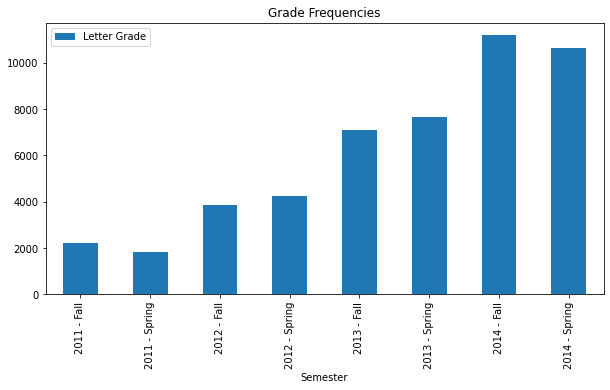

In [5]:
grade_dist = df[['Semester', 'Letter Grade']].groupby(['Semester'], as_index=False).count()
print(grade_dist)
grade_dist.plot('Semester', 'Letter Grade', 'bar', title='Grade Frequencies', figsize=(10,5))

In [6]:
df.to_csv('processed_dataset.csv', index=False)